# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [142]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import pandas as pd

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import the model and preferences
import inauguralproject
from inauguralproject import HouseholdSpecializationModelClass as HSMC

model = HSMC()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

**Explain how you solve the model**

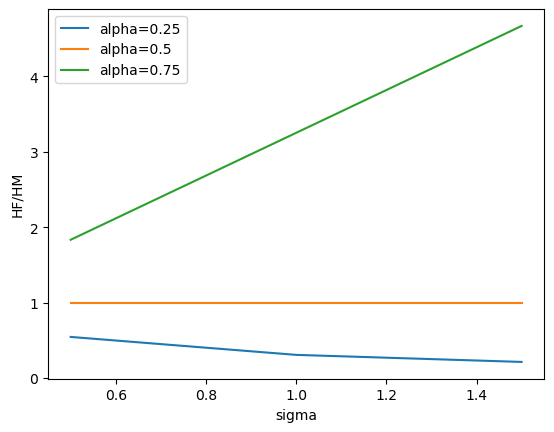

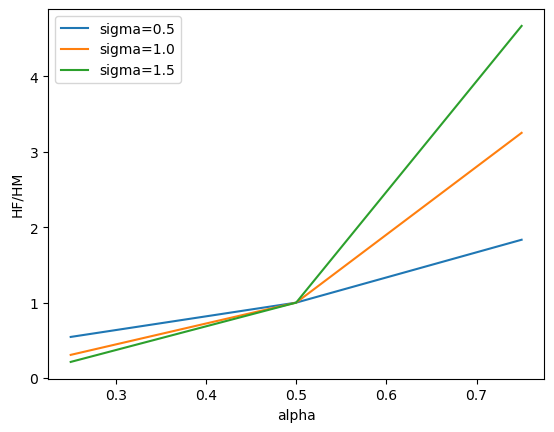

In [143]:


# define values of alpha and sigma to loop through
alpha_values = [0.25, 0.5, 0.75]
sigma_values = [0.5, 1.0, 1.5]

# initialize dictionary to store results
resultsHF = {}
resultsHM = {}

# loop through all combinations of alpha and sigma
for alpha in alpha_values:
    for sigma in sigma_values:
        # set values of alpha and sigma in the model
        model.par.alpha = alpha
        model.par.sigma = sigma
        
        # solve the model and store the result
        opt = model.solve_discrete()
        resultsHF[(alpha, sigma)] = opt.HF
        resultsHM[(alpha, sigma)] = opt.HM

# plot the results
fig, ax = plt.subplots()
for alpha in alpha_values:
    y = [resultsHF[(alpha, sigma)]/resultsHM[(alpha,sigma)] for sigma in sigma_values]
    ax.plot(sigma_values, y, label=f"alpha={alpha}")
ax.set_xlabel("sigma")
ax.set_ylabel("HF/HM")
ax.legend()
plt.show()

fig, ax = plt.subplots()
for sigma in sigma_values:
    y = [resultsHF[(alpha, sigma)]/resultsHM[(alpha,sigma)] for alpha in alpha_values]
    ax.plot(alpha_values, y, label=f"sigma={sigma}")
ax.set_xlabel("alpha")
ax.set_ylabel("HF/HM")
ax.legend()
plt.show()


# Question 2

Explain your code and procedure

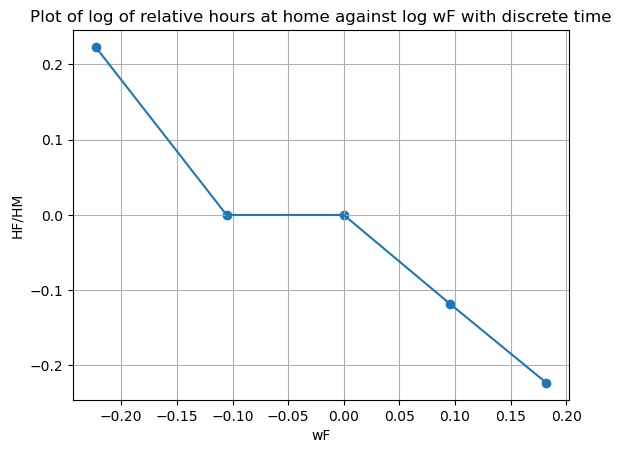

{0.8: 5.0, 0.9: 4.5, 1.0: 4.5, 1.1: 4.0, 1.2: 4.0}
{0.8: 4.0, 0.9: 4.5, 1.0: 4.5, 1.1: 4.5, 1.2: 5.0}


In [144]:
# create instance of the model
model2 = HSMC()

# define values of alpha and sigma to loop through
wF_values = [0.8, 0.9, 1.0, 1.1, 1.2]


# initialize dictionary to store results
resultsHF = {}
resultsHM = {}

for wF in wF_values:
    # set values of alpha and sigma in the model
    model2.par.wF = wF
        
    # solve the model and store the result
    opt = model2.solve_discrete()
    resultsHF[wF] = opt.HF
    resultsHM[wF] = opt.HM

# plot the results
fig, ax = plt.subplots()
for wf in wF_values:
    y = [np.log(resultsHF[wF]/resultsHM[wF]) for wF in wF_values]
ax.plot(np.log(wF_values),y)
ax.scatter(np.log(wF_values),y)
ax.grid(True)
ax.set_xlabel("wF")
ax.set_ylabel("HF/HM")
ax.set_title("Plot of log of relative hours at home against log wF with discrete time")
plt.show()

print(resultsHF)
print(resultsHM)



Når den relative løn for kvinder falder, vil de bruge mere tid hjemmet.

# Question 3

Instead of doing a discrete analysis providng a linear interval we now optimize in each periode to the optimal values for doing work at home for each wage.

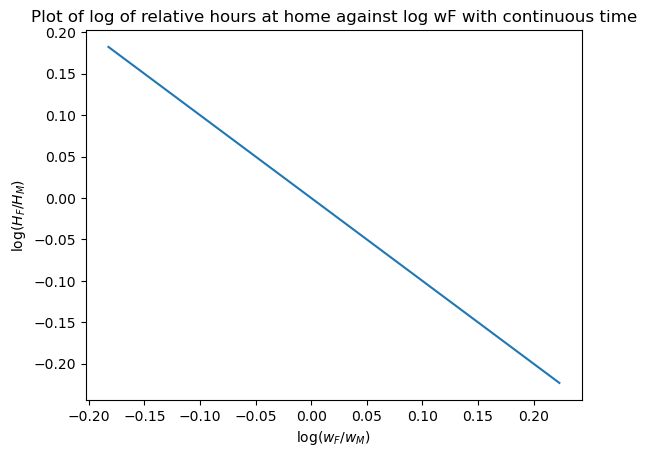

In [145]:
model3 = HSMC()

model3.solve_wF_vec()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(np.log(model3.sol.HF_vec / model3.sol.HM_vec), np.log(model3.par.wF_vec))
plt.xlabel('$\log(w_F / w_M)$')
plt.ylabel('$\log(H_F/H_M)$')
ax.set_title("Plot of log of relative hours at home against log wF with continuous time")
plt.show()


When going from discrete to continuous timeframe we get a more smooth line when chaning the relative wage.

## Question 4

In [146]:
# Printing the result of our regression

model.estimate(do_print=True)


α_opt = 0.9820137441
σ_opt = 0.1000000610
Residual_opt = 0.000000


The optimal $\alpha$ and $\sigma$ is therefore $\alpha_O = 0.982$ and $\sigma_O = 0.100$

Comparing results to the article from Siminski and Yetsenga (2022). Starting by generating a plot for their results.

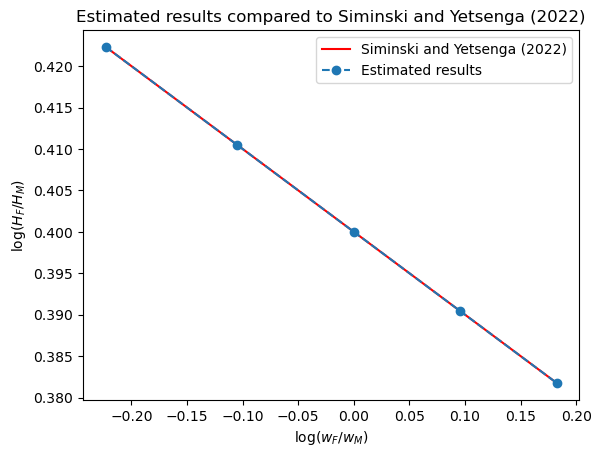

In [147]:
model.solve_wF_vec()

log_ratio_continuous = np.log(model.sol.HF_vec / model.sol.HM_vec)
log_wF = np.log(model.par.wF_vec)

x = np.log(np.linspace(0.8,1.2,2))
y = model.par.beta0_target + model.par.beta1_target*x

plt.plot(x, y, color = "red", linestyle = "-", label = "Siminski and Yetsenga (2022)")
plt.plot(log_wF, log_ratio_continuous, marker = "o", linestyle = "--", label = "Estimated results")
plt.legend(loc="upper right")
plt.title("Estimated results compared to Siminski and Yetsenga (2022)")
plt.xlabel('$\log(w_F / w_M)$')
plt.ylabel('$\log(H_F/H_M)$')
plt.show()